## Set up imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar

## Line plot

In [2]:
stock = pd.read_csv('GOOG.csv', header = None, delimiter = ',')

In [3]:
stock.columns = ['Date', 'Price']
stock['Date'] = pd.to_datetime(stock['Date'], format='%d-%m-%Y')

In [4]:
indexed_stock = stock.set_index('Date')
type(stock.Date)

pandas.core.series.Series

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


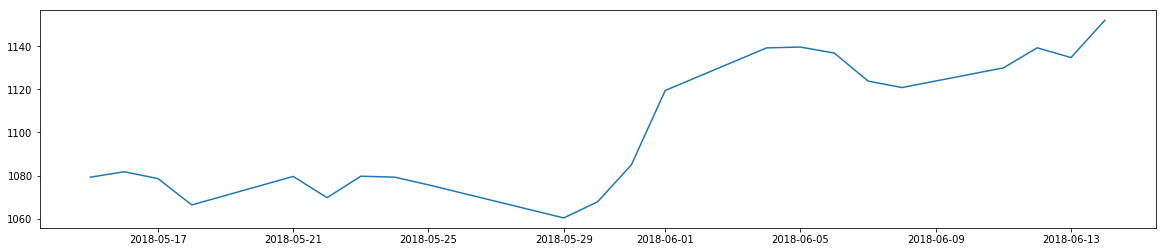

In [5]:
plt.figure(figsize=(20, 4))
plt.plot(indexed_stock.Price)
plt.show()

In [6]:
df = pd.read_csv('GOOG.csv', header = None, names = ['date', 'price'], index_col = ['date'])

<function matplotlib.pyplot.show(*args, **kw)>

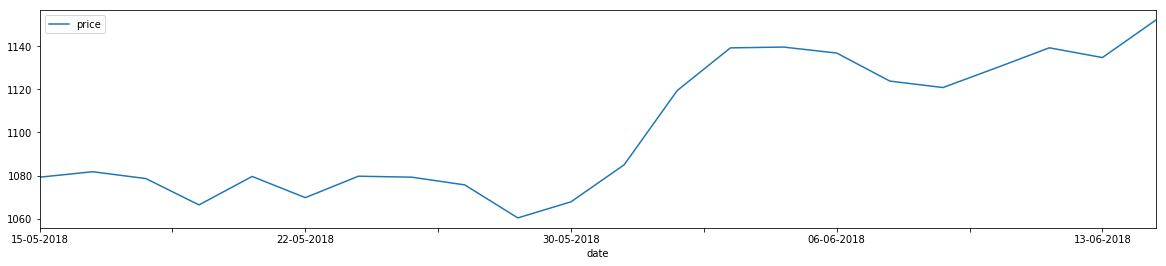

In [7]:
df.plot(figsize=(20, 4))
plt.show

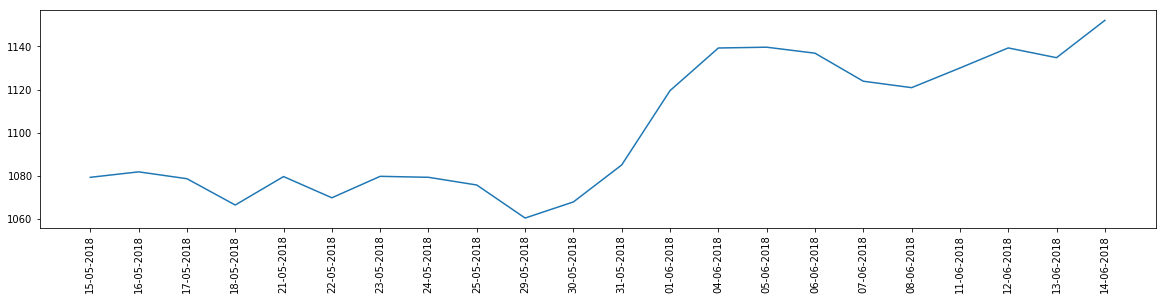

In [8]:
plt.figure(figsize=(20, 4), )
plt.plot(df.price)
plt.xticks(rotation=90)
plt.show()

## Bar plot

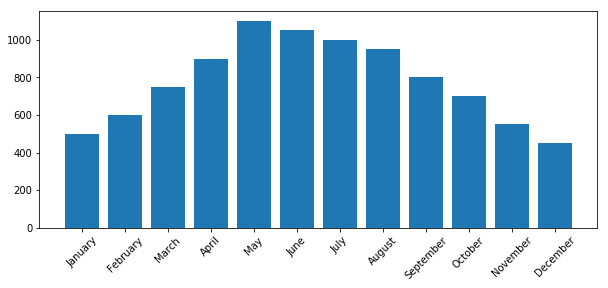

In [9]:
month_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
units_sold = [500, 600, 750, 900, 1100, 1050, 1000, 950, 800, 700, 550, 450]
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
plt.xticks(month_num, calendar.month_name[1:13], rotation = 45)
plot = ax.bar(month_num, units_sold)
plt.show()

In [10]:
for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002 * height, '%d' % int(height), ha='center', va='bottom')

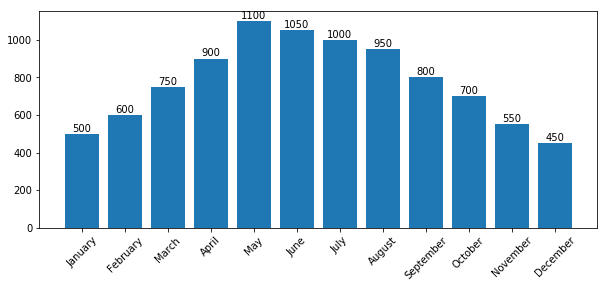

In [11]:
fig

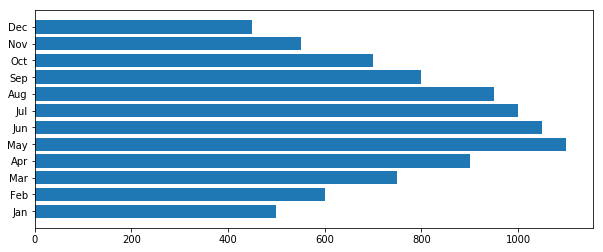

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
plt.yticks(month_num, calendar.month_abbr[1:13])
plot = ax.barh(month_num, units_sold)
plt.show()

## Scatter plot

In [13]:
data = pd.read_excel('scatter_ex.xlsx', 'age_weight')

In [14]:
x = data['age']
y = data['weight']

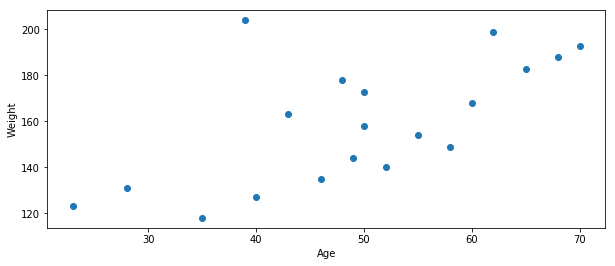

In [15]:
plt.figure(figsize=(10, 4))
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [16]:
iris = pd.read_csv('iris_dataset.csv', delimiter = ',')

In [17]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [18]:
iris.species = iris.species.map({"setosa": 0, "versicolor":1, "virginica":2 })

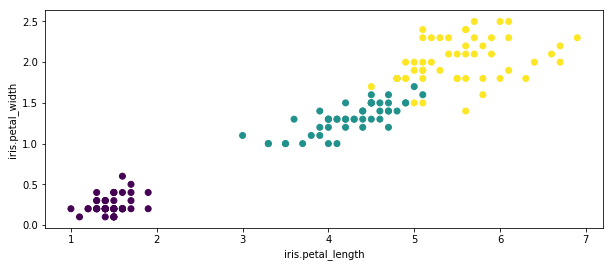

In [19]:
plt.figure(figsize=(10,4))
plt.scatter(iris.petal_length, iris.petal_width, c=iris.species)
plt.xlabel("iris.petal_length")
plt.ylabel("iris.petal_width")
plt.show()

## Bubble plot

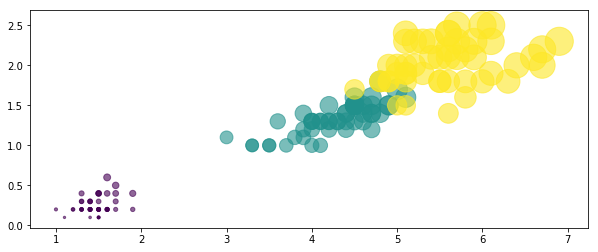

In [20]:
# The only difference is parameter s, and alpha
fig, ax = plt.subplots()
ax = plt.scatter(iris.petal_length, iris.petal_width, 
                 c=iris.species, s=50*iris.petal_length*iris.petal_width,
                 alpha = 0.6)
fig.set_size_inches(10, 4)

## Stacked plot

In [21]:
# Product defects by months:

x = np.array([1, 2, 3, 4, 5, 6], dtype=np.int32)  # Data type is integer -- product defect codes
Apr = [5, 7, 6, 8, 7, 9]
May = [0, 4, 3, 7, 8, 9]
June = [6, 7, 4, 5, 6, 8]

In [22]:
labels = ["April", "May", "June"]

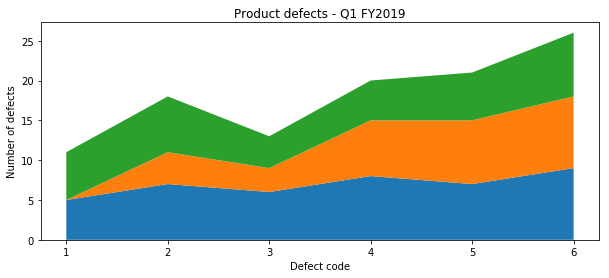

In [23]:
fig, ax = plt.subplots()
ax.stackplot(x, Apr, May, June, labels=labels)
fig.set_size_inches(10,4)
plt.xlabel("Defect code")
plt.ylabel("Number of defects")
plt.title("Product defects - Q1 FY2019")
plt.show()

## Pie plot

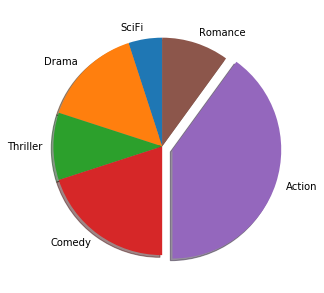

In [24]:
sectors = ["SciFi", "Drama", "Thriller", "Comedy", "Action", "Romance"]
sizes = [5, 15, 10, 20, 40, 10]

fig, ax = plt.subplots()
ax = plt.pie(sizes, labels=sectors, explode=(0, 0, 0, 0, 0.1, 0), shadow=True, startangle=90)
fig.set_size_inches(5, 5)
plt.show()

## Table chart

In [25]:
rows = ['2011', '2012', '2013', '2014', '2015']
columns = ('7Ah', '35Ah', '40Ah', '135Ah', '150Ah')
data = [[75, 144, 114, 102, 108],
       [90, 126, 102, 84, 126],
       [96, 114, 75, 105, 135],
       [105, 90, 150, 90, 75],
       [90, 75, 135, 75, 90]]

In [28]:
values = np.arange(0, 600, 100)
colors = plt.cm.OrRd(np.linspace(0, 0.5, len(rows)))
index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

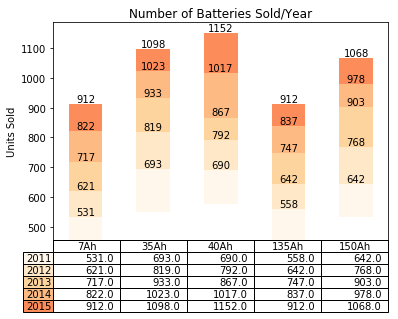

In [32]:
fig, ax = plt.subplots()
cell_text = []

n_rows = len(data)
for row in range(n_rows):
    plot = plt.bar(index, data[row], bar_width, bottom=y_offset,
                  color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i = 0
    # Each iteration of thsi for-loop, labels each bar with corresponding value for the given year
    for rect in plot: 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i], '%d'
               % int(y_offset[i]), 
               ha='center', va='bottom')
        i = i+1
        
the_table = plt.table(cellText=cell_text, rowLabels=rows, 
                     rowColours=colors, colLabels=columns, loc='bottom')
plt.ylabel("Units Sold")
plt.xticks([])
plt.title("Number of Batteries Sold/Year")
plt.show()

In [37]:
# Add a table to the bottom of the axis

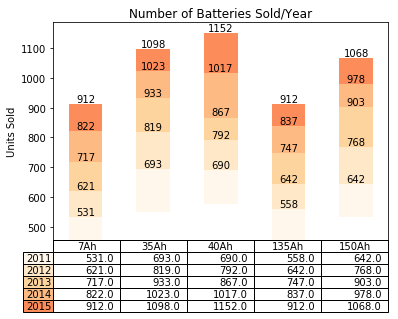

In [36]:
fig

## Polar plot

In [38]:
Depts = ["COGS", "IT", "Payroll", "R&D", "Sales & Marketing"]
rp = [30, 15, 25, 10, 20, 30]
ra = [32, 20, 23, 11, 14, 32]
theta = np.linspace(0, 2 * np.pi, len(rp))

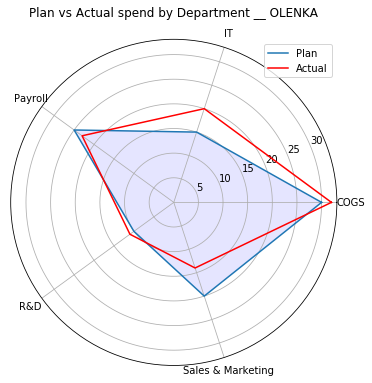

In [61]:
plt.figure(figsize=(10,6))
plt.subplot(polar=True)
(lines, labels) = plt.thetagrids(range(0, 360, int(360/len(Depts))), (Depts))
plt.plot(theta, rp)
plt.fill(theta, rp, 'b', alpha=0.1)
plt.plot(theta, ra, 'r')
plt.legend(labels=('Plan', 'Actual'), loc=1)
plt.title('Plan vs Actual spend by Department __ OLENKA')
plt.show()

## Histogram

In [ ]:
grp_exp = np.random.randint(0, 21, (1, 100))

In [58]:
nbins = 21
n, bins, patches = plt.hist(grp_exp, bins=nbins)
plt.axvline(x=grp_exp.mean(), linewidth=2, color='r')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x120c69268> (for post_execute):


KeyboardInterrupt: 

## Box plot

## Violin plot

## Reading and displaying images

## Heatmap

## Hilton diagram

## Triangulation

## Stream plot

## Path

In [62]:
x = 3

In [63]:
x

3

In [64]:
x + 2

5

In [65]:
y = 1

In [66]:
x+y 

4

In [72]:
class girl:
    def __init__(self, name):
        self.name = name

In [73]:
me = girl

In [74]:
me.name = 'Olenka'

In [75]:
me.name

'Olenka'